# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.078319e+01     7.226676e+00
 * time: 0.004549980163574219
     1     2.768496e+01     4.662674e+00
 * time: 0.013296842575073242
     2     2.127265e+01     6.882533e+00
 * time: 0.03408384323120117
     3     1.262482e+01     2.463061e+00
 * time: 0.05893397331237793
     4     1.160952e+01     2.324838e+00
 * time: 0.0756077766418457
     5     1.112203e+01     1.536693e+00
 * time: 0.09233999252319336
     6     1.000830e+01     1.804505e+00
 * time: 0.10900592803955078
     7     9.310444e+00     8.073190e-01
 * time: 0.12555599212646484
     8     8.988110e+00     7.538164e-01
 * time: 0.14216399192810059
     9     8.852919e+00     5.265671e-01
 * time: 0.1588459014892578
    10     8.809603e+00     1.051279e+00
 * time: 0.17143797874450684
    11     8.759927e+00     5.002381e-01
 * time: 0.18416786193847656
    12     8.682188e+00     3.836266e-01
 * time: 0.19681501388549805
    13     8.600422e+00     4.211187e-01
 * time:

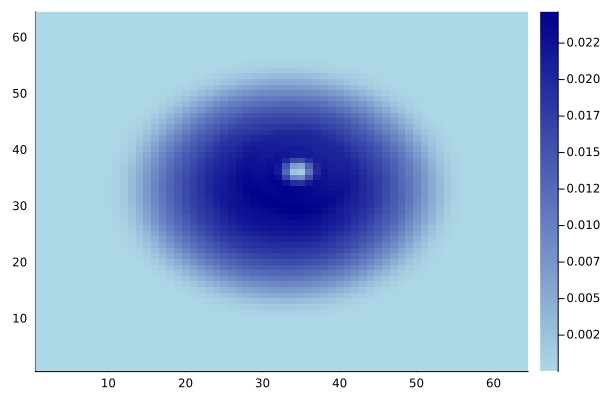

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)